<a href="https://colab.research.google.com/github/Vandana0606/Financial_Analyst/blob/main/Daily_Financial_Transactions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Project: Daily Financial Transactions Analysis

# Objective:
# ● Analyze daily financial transactions to identify trends, patterns, and insights.
# ● Generate a comprehensive report with visualizations.

# Dataset Description:
# ● Date: Date of the transaction.
# ● Transaction_ID: Unique identifier for each transaction.
# ● Account_ID: Unique identifier for the account.
# ● Category: Category of the transaction (e.g., Sales, Purchase, Salary).
# ● Amount: Amount of money involved in the transaction.
# ● Type: Type of transaction (Credit or Debit).

In [3]:
# Steps to Complete the Project:
# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting style
sns.set(style="whitegrid")

In [7]:
# Load the dataset
df = pd.read_csv("/content/Daily Household Transactions.csv")

In [8]:
# Display the first few rows of the dataset
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [9]:
df.shape
df.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [10]:
df.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB
None


In [12]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [13]:
# Step 2: Data Cleaning
# ● Handle missing values.
# ● Correct data types.
# ● Remove duplicates.

In [14]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [15]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [17]:
# Fill or drop missing values
if 'category' in df.columns:
    df['category'] = df['category'].fillna('Unknown')

# Drop rows with missing date or amount
df.dropna(subset=['date', 'amount'], inplace=True)

# Convert data types
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify data types
print(df.dtypes)

date              datetime64[ns]
mode                      object
category                  object
subcategory               object
note                      object
amount                   float64
income/expense            object
currency                  object
dtype: object


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Summary statistics
df.describe()

,date,amount
count,1303,2057.000000
mean,2017-05-12 20:41:38.546431232,2791.281176
min,2015-01-13 18:52:47,2.000000
25%,2016-12-18 20:18:45.500000,30.000000
50%,2017-07-27 20:05:23,80.000000
75%,2018-01-30 12:09:30.500000,330.000000
max,2018-09-20 12:04:08,250000.000000
std,NaN,13598.659347


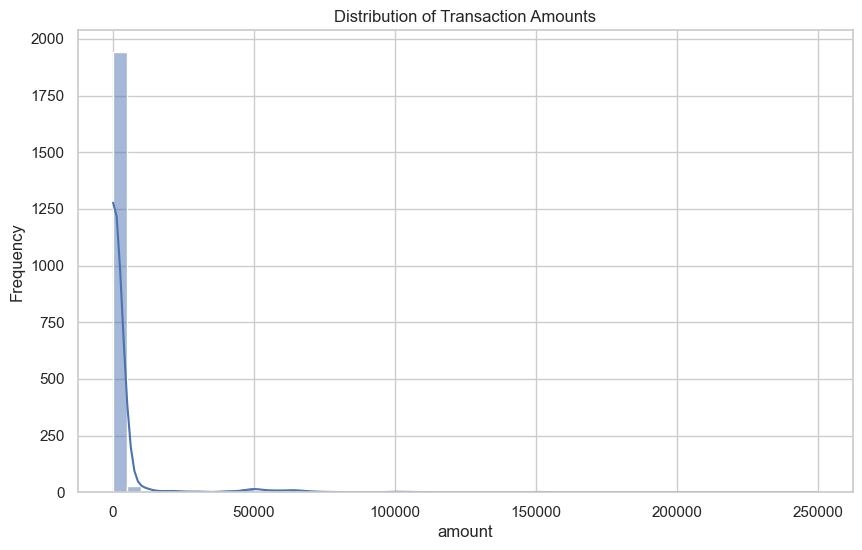

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('amount')
plt.ylabel('Frequency')
plt.show()

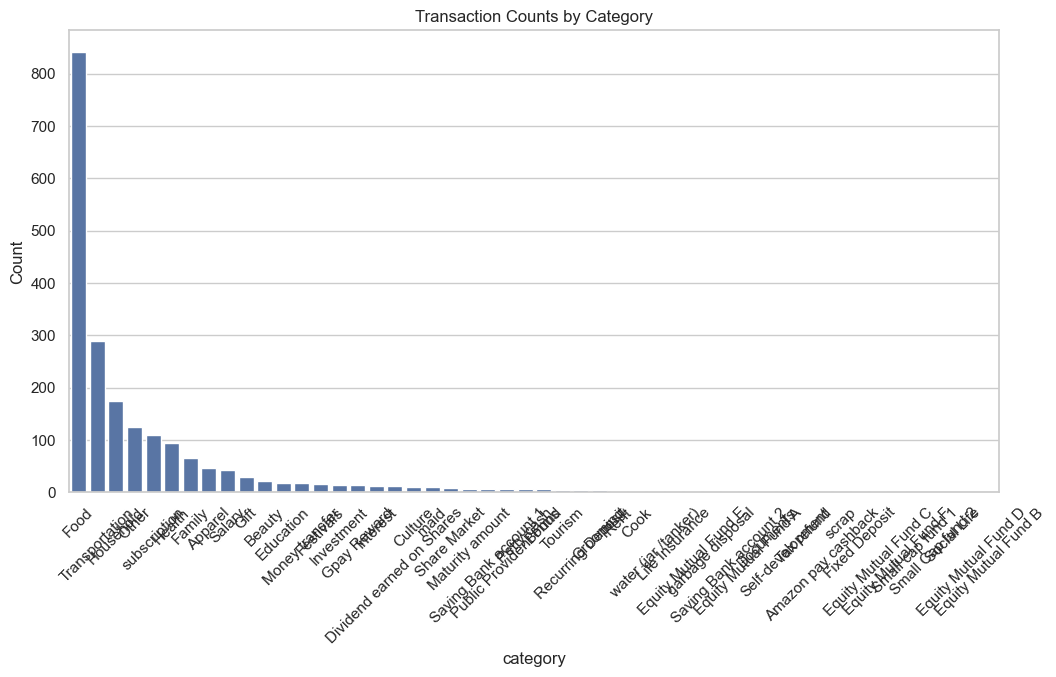

In [ ]:
# Transaction counts by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Transaction Counts by Category')

plt.xlabel('category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

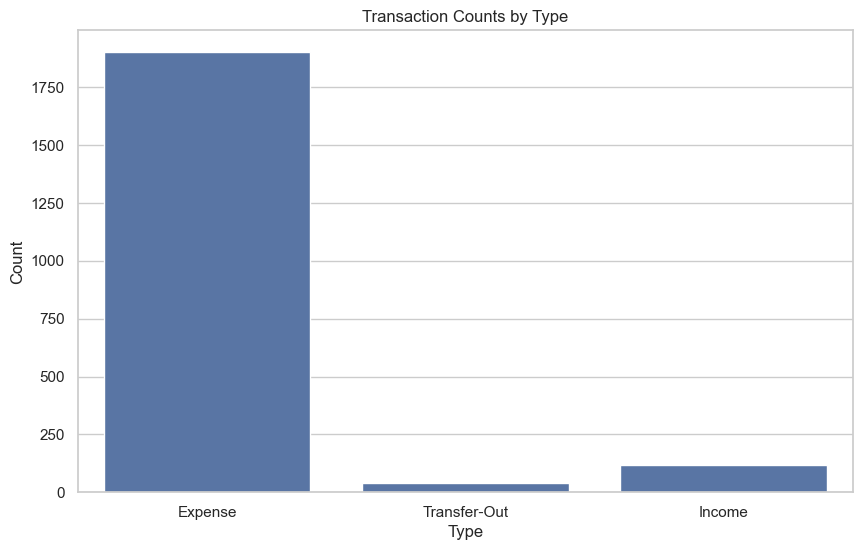

In [ ]:
# Transaction counts by type
plt.figure(figsize=(10, 6))

# Changed 'x' from 'Type' to 'Income/Expense' based on later usage in the notebook
sns.countplot(data=df, x='income/expense')
plt.title('Transaction Counts by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9724\2160188703.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='date').sum()


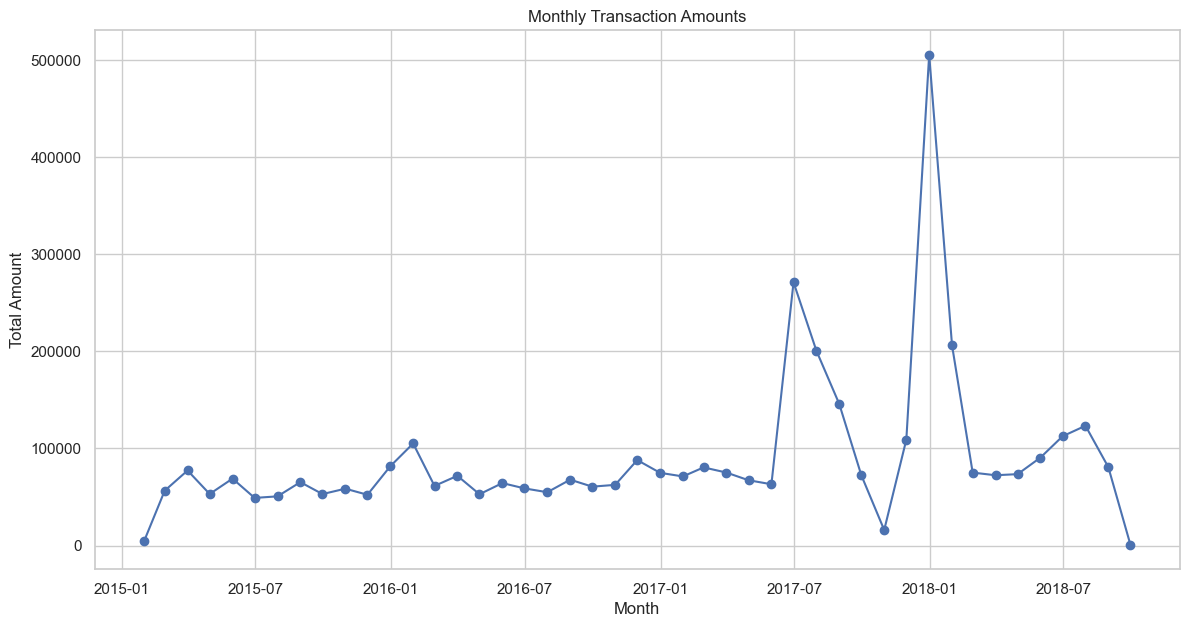

In [ ]:
# Step 4: Time Series Analysis
# ● Trend analysis.
# ● Monthly and daily trends.

# Resample data to monthly frequency
monthly_data = df.resample('M', on='date').sum()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')

plt.grid(True)
plt.show()

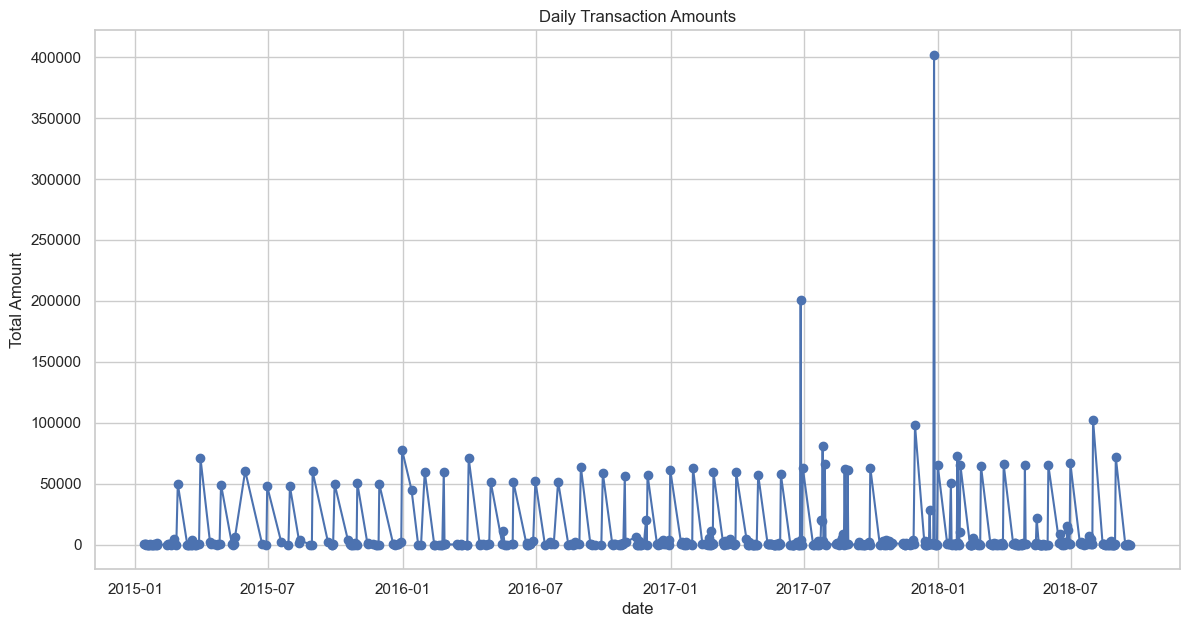

In [ ]:
# Daily trends
# Group by the date part of the Date column and sum only the 'Amount' column
daily_data = df.groupby(df['date'].dt.date)['amount'].sum()

plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data, marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [ ]:
# Step 5: Correlation Analysis
# ● Analyze the correlation between transaction categories and amounts.

# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(index='date', columns='category', values='amount',
aggfunc='sum', fill_value=0)

In [ ]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

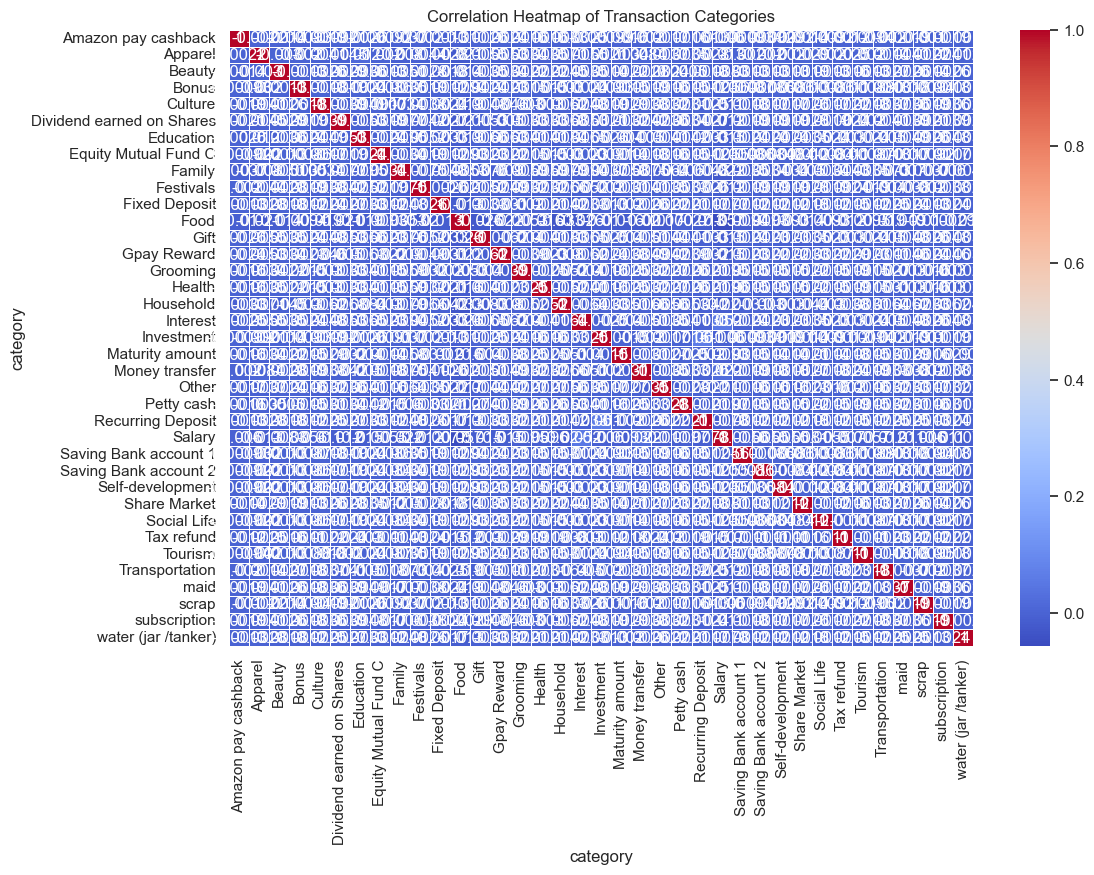

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()

In [ ]:
# Step 6: Generate Report
# ● Summarize findings and visualizations.
print("\n--- Report Summary ---")
print(f"Total Transactions: {len(df)}")
print(f"Total Unique Categories: {df['category'].nunique()}")
print(f"Time Period: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Total Amount: {df['amount'].sum():,.2f}")
print("\nTop Categories by Total Amount:")
print(df.groupby('category')['amount'].sum().sort_values(ascending=False).head())


--- Report Summary ---
Total Transactions: 2057
Total Unique Categories: 50
Time Period: 2015-01-13 to 2018-09-20
Total Amount: 5,741,665.38

Top Categories by Total Amount:
category
Salary             2526576.45
Fixed Deposit       450000.00
Maturity amount     382792.00
Money transfer      341528.90
Share Market        276161.00
Name: amount, dtype: float64
